In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA



# Load the NumPy data files
train_images = np.load('kmnist-train-imgs.npz')['arr_0']
train_labels = np.load('kmnist-train-labels.npz')['arr_0']
test_images = np.load('kmnist-test-imgs.npz')['arr_0']
test_labels = np.load('kmnist-test-labels.npz')['arr_0']

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0



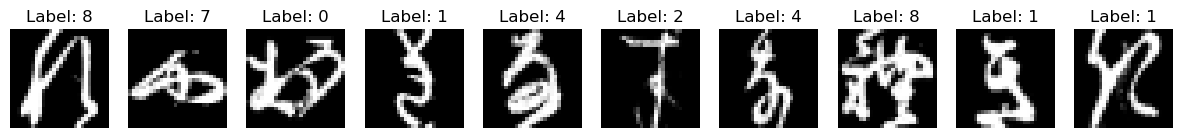

In [5]:
# Display the first 10 images
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i in range(10):
    axes[i].imshow(train_images[i], cmap='gray')
    axes[i].set_title(f'Label: {train_labels[i]}')
    axes[i].axis('off')
plt.show()

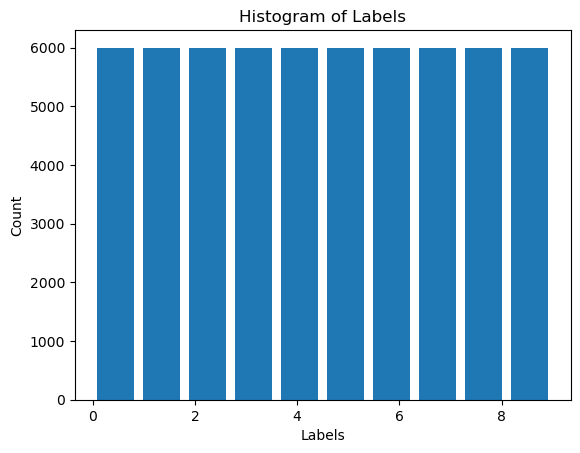

In [6]:
plt.hist(train_labels, bins=10, rwidth=0.8)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Histogram of Labels')
plt.show()

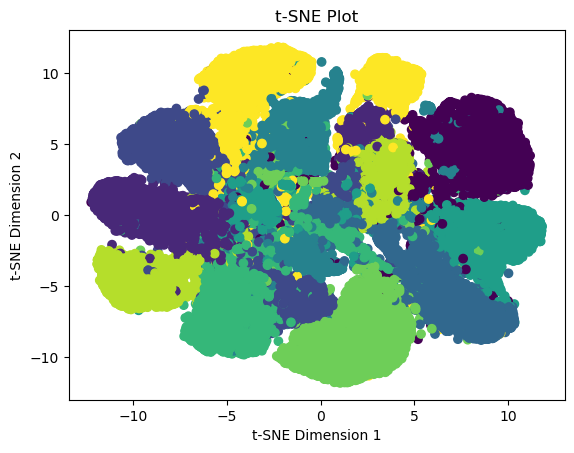

In [7]:
from sklearn.manifold import TSNE

# Load your data here

# Adjust t-SNE parameters
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, n_iter_without_progress=100, random_state=42)
tsne_result = tsne.fit_transform(train_images.reshape(train_images.shape[0], -1))

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=train_labels, cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Plot')
plt.show()


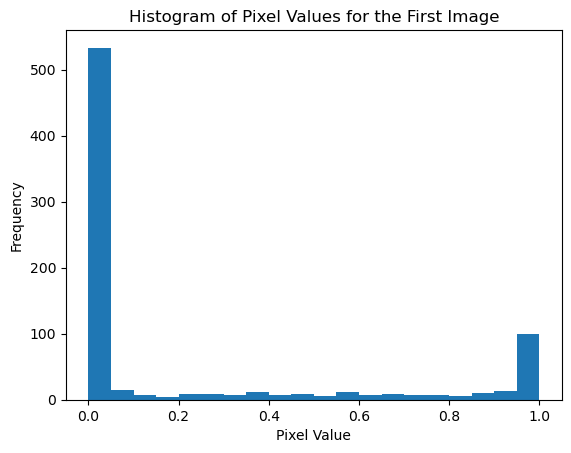

In [8]:
# Example: Visualize the pixel values of the first image
plt.hist(train_images[0].ravel(), bins=20)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Values for the First Image')
plt.show()

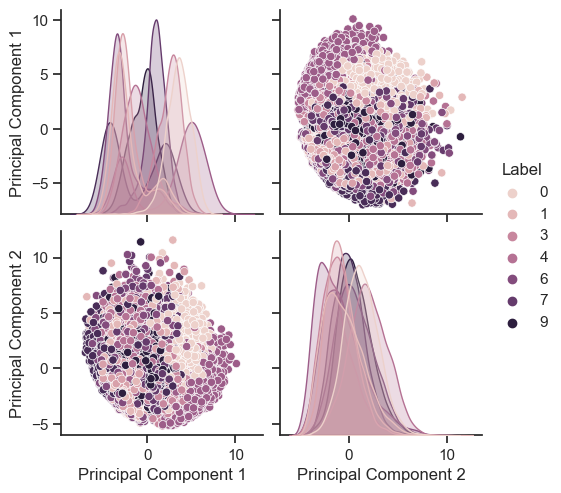

In [12]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(train_images.reshape(train_images.shape[0], -1))

# Create a DataFrame with the reduced data and labels
subset_data = pd.DataFrame({
    'Principal Component 1': reduced_features[:, 0],
    'Principal Component 2': reduced_features[:, 1],
    'Label': train_labels
})

# Example: Pair plot with consistent filled circle markers for all classes
sns.set(style="ticks")
sns.pairplot(subset_data, hue='Label', markers="o")
plt.show()

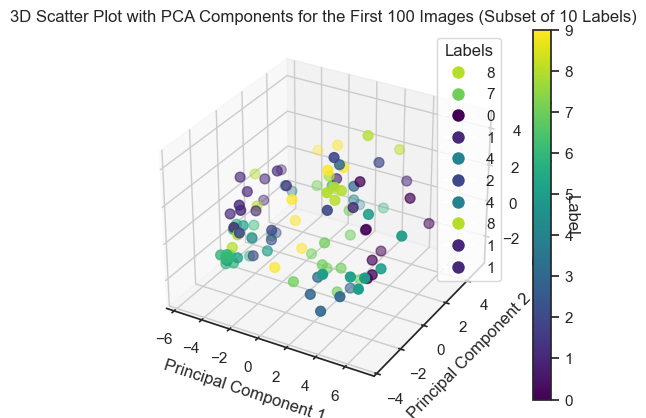

In [13]:
# Define the number of labels to display in the legend
N = 10  # Number of labels to display

# Perform PCA for dimensionality reduction
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(train_images.reshape(train_images.shape[0], -1))

# Create a 3D scatter plot using the first three principal components
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping based on labels
scatter = ax.scatter(
    reduced_features[:100, 0], reduced_features[:100, 1], reduced_features[:100, 2],
    c=train_labels[:100], cmap='viridis', marker='o', s=50
)

# Add a colorbar to the plot
cbar = plt.colorbar(scatter)
cbar.set_label('Label', rotation=270)

# Create a legend for the scatter plot with a subset of labels
subset_labels = train_labels[:N]
subset_colors = scatter.to_rgba(subset_labels)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=10) for c in subset_colors]
labels = [str(label) for label in subset_labels]
ax.legend(handles, labels, title='Labels', loc='upper right')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title(f'3D Scatter Plot with PCA Components for the First 100 Images (Subset of {N} Labels)')
plt.show()

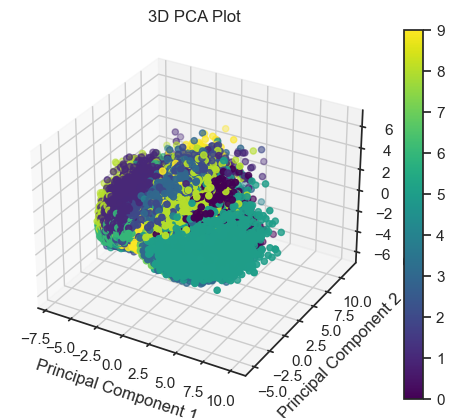

In [14]:
# Perform PCA for dimensionality reduction with 3 principal components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(train_images.reshape(train_images.shape[0], -1))

# Create a 3D PCA plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=train_labels, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA Plot')
fig.colorbar(scatter)
plt.show()

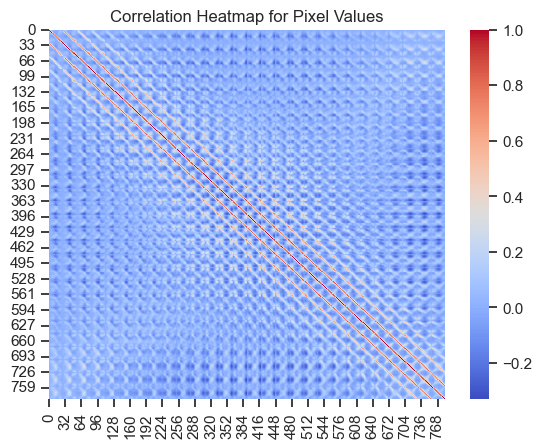

In [15]:
# Reshape the images and create a DataFrame
reshaped_images = train_images.reshape(train_images.shape[0], -1)
df = pd.DataFrame(reshaped_images)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap for Pixel Values')
plt.show()

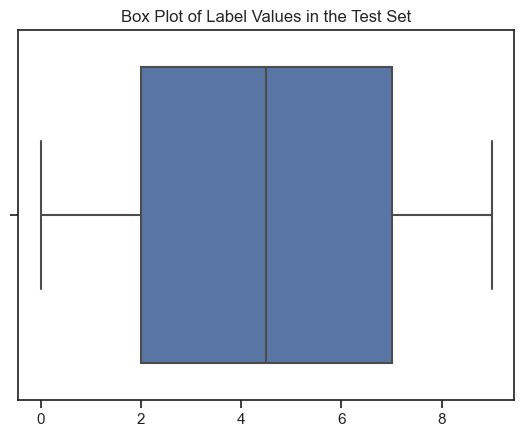

In [16]:
# Example: Visualize the distribution of label values in the test set
sns.boxplot(x=test_labels)
plt.title('Box Plot of Label Values in the Test Set')
plt.show()

In [17]:
# Define the MLP model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output units for 10 categories
])

# Compile the model
model.compile(optimizer='adam',  # You can adjust the learning rate and optimizer as needed
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Define early stopping based on validation loss
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,  # Stop training after 5 epochs without improvement
    restore_best_weights=True  # Restore model to best weights when stopping
)

# Train the model with early stopping
history = model.fit(train_images, train_labels, epochs=100, validation_data=(test_images, test_labels), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3840 - accuracy: 0.8834 - val_loss: 0.4877 - val_accuracy: 0.8511
Epo

313/313 [==============================] - 1s 2ms/step - loss: 0.4000 - accuracy: 0.8958
Test accuracy: 0.895799994468689


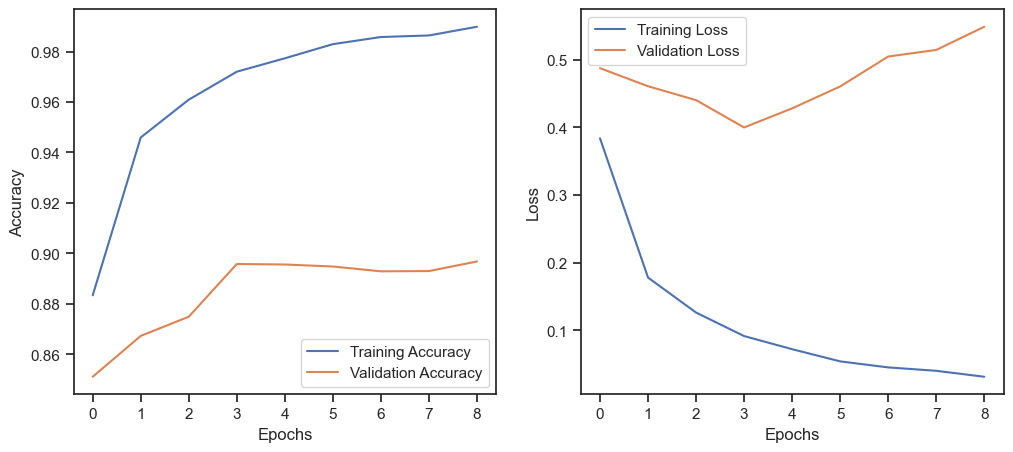

In [18]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
accuracy_data = {
    'Epoch': list(range(1, len(history.history['accuracy']) + 1)),
    'Training Accuracy': history.history['accuracy'],
    'Validation Accuracy': history.history['val_accuracy']
}

loss_data = {
    'Epoch': list(range(1, len(history.history['loss']) + 1)),
    'Training Loss': history.history['loss'],
    'Validation Loss': history.history['val_loss']
}

df_accuracy = pd.DataFrame(accuracy_data)
df_loss = pd.DataFrame(loss_data)

# Display the tables
print("Accuracy History:")
print(df_accuracy)

print("\nLoss History:")
print(df_loss)

Accuracy History:
   Epoch  Training Accuracy  Validation Accuracy
0      1           0.883400               0.8511
1      2           0.945967               0.8673
2      3           0.960950               0.8749
3      4           0.972033               0.8958
4      5           0.977350               0.8956
5      6           0.982950               0.8948
6      7           0.985783               0.8929
7      8           0.986400               0.8930
8      9           0.989850               0.8968

Loss History:
   Epoch  Training Loss  Validation Loss
0      1       0.384022         0.487675
1      2       0.178025         0.460983
2      3       0.126289         0.440432
3      4       0.091525         0.400004
4      5       0.072123         0.428285
5      6       0.054091         0.460639
6      7       0.045182         0.504917
7      8       0.040137         0.514669
8      9       0.031356         0.548942


313/313 [==============================] - 1s 2ms/step


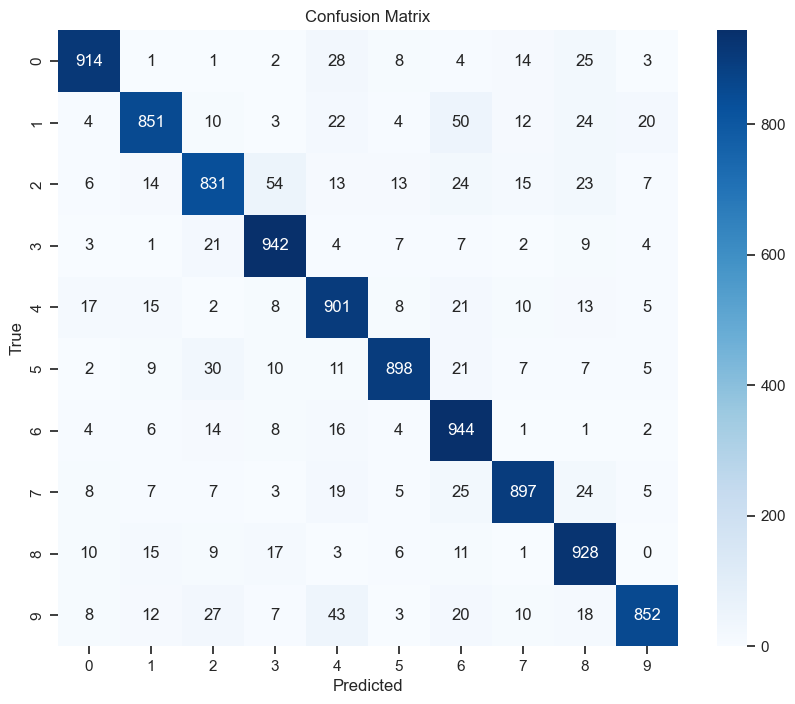

In [20]:
test_predictions = model.predict(test_images)
test_predictions_classes = np.argmax(test_predictions, axis=1)
confusion_mtx = confusion_matrix(test_labels, test_predictions_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [21]:
# Calculate the F1 score
f1 = f1_score(test_labels, test_predictions_classes, average='weighted')

print(f"Weighted F1 Score: {f1:.4f}")

Weighted F1 Score: 0.8958


In [22]:
val_loss = history.history['val_loss']
print(f"Validation Loss: {val_loss[-1]:.4f}")

Validation Loss: 0.5489


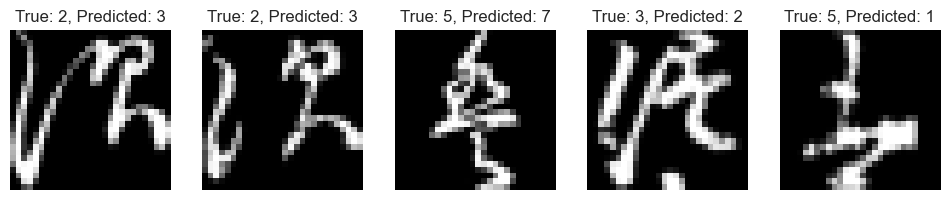

In [23]:
misclassified_indices = np.where(test_labels != test_predictions_classes)[0]

plt.figure(figsize=(12, 4))
for i, idx in enumerate(misclassified_indices[:5]):  # Display the first 5 misclassified examples
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')  # Reshape the image
    plt.title(f"True: {test_labels[idx]}, Predicted: {test_predictions_classes[idx]}")
    plt.axis('off')
plt.show()